In [947]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 1 Importando a Tabela

In [948]:
base = pd.read_csv(r"D:\PosFIAP\ArquivosTC4\Obesity.csv", sep=',')
base.head(10)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


## 1.1 Informações básicas

In [949]:
base.describe().round(2)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [950]:
# Vamos renomear as colunas
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [951]:
# Pelo menos não temos colunas com dados nulos
base.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

## 1.2 Tratando a base

### 1.2.1 Renomeando as colunas

In [953]:
base.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Import para criação de Pipeline

In [954]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

## Criando classes para a tratamento dos dados da planilha de obsidade

In [ ]:
#Alterando nomes das colunas
class RenomearColunasTransf(BaseEstimator, TransformerMixin):
    def __init__(self, columns_map=None):
        columns_map = {'Gender':'genero',
                'Age':'idade',
                'Height':'altura',
                'Weight':'peso',
                'family_history':'historico_familiar',
                'FAVC':'calorias_frequente',
                'FCVC':'vegetais_refeicao',
                'NCP':'refeicoes_diaria',
                'CAEC':'entre_refeicao',
                'SMOKE':'fuma',
                'CH2O':'litros_agua',
                'SCC':'monitora_calorias',
                'FAF':'frequencia_atividade',
                'TUE':'tempo_tecnologia',
                'CALC':'frequencia_alcool',
                'MTRANS':'transporte_usado',
                'Obesity':'nvl_obsidade'}
        self.columns_map = columns_map if columns_map is not None else {}

    def fit(self, X, y=None):
        # Nada a aprender, apenas retorna o próprio objeto
        return self

    def transform(self, X):
        X_ = X.copy()
        X_.rename(columns=self.columns_map, inplace=True)
        return X_
    

In [956]:
class MultiLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        """
        columns: lista de colunas a codificar com LabelEncoder
        """
        self.columns = columns
        self.encoders = {}

    def fit(self, X, y=None):
        X_ = X.copy()
        for col in self.columns:
            le = LabelEncoder()
            le.fit(X_[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        X_ = X.copy()
        for col, le in self.encoders.items():
            X_[f"{col}_cod"] = le.transform(X_[col])
        return X_

In [957]:
class YesNoToBinaryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        columns = ['historico_familiar', 'calorias_frequente', 'fuma', 'monitora_calorias']
        self.columns = columns

    def fit(self, X, y=None):
        # Nada a aprender, apenas retorna o próprio transformer
        return self

    def transform(self, X):
        X_ = X.copy()

        mapping = {'yes': 1, 'no': 0}

        # Converte apenas as colunas selecionadas
        for col in self.columns:
            if col in X_.columns:
                X_[col] = X_[col].map(mapping)

        return X_

In [958]:
class MinMax(BaseEstimator, TransformerMixin):
    def __init__(self,min_max_scaler=['idade','altura','peso','vegetais_refeicao'
                                      ,'refeicoes_diaria','litros_agua','frequencia_atividade']):
        self.min_max_scaler = min_max_scaler

    def fit(self, df):
        return self
    
    def transform(self, df):
        if(set(self.min_max_scaler).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler] = min_max_enc.fit_transform(df[self.min_max_scaler])
            return df
        else:
            print('Uma ou mais colunas não existentes, por favor verifique!')
            return df

In [959]:
class OrdinalEncodingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, encoding_map=None):
        encoding_map = {
            "entre_refeicao": ["no", "Sometimes", "Frequently", "Always"],
            "frequencia_alcool": ["no", "Sometimes", "Frequently", "Always"],
            "nvl_obsidade": [
                "Insufficient_Weight",
                "Normal_Weight",
                "Overweight_Level_I",
                "Overweight_Level_II",
                "Obesity_Type_I",
                "Obesity_Type_II",
                "Obesity_Type_III"
            ]
        }
        self.encoding_map = encoding_map
        self.encoders = {}

    def fit(self, X, y=None):
        X_ = X.copy()

        for col, ordem in self.encoding_map.items():
            enc = OrdinalEncoder(
                categories=[ordem],
                handle_unknown='use_encoded_value',
                unknown_value=-1
            )
            enc.fit(X_[[col]])
            self.encoders[col] = enc

        return self

    def transform(self, X):
        X_ = X.copy()

        for col, enc in self.encoders.items():
            X_[f"{col}_ord"] = enc.transform(X_[[col]])

        return X_

In [961]:
class DummyEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, prefix=None, drop_first=False):
        columns=["transporte_usado"]
        prefix="transporte"
        self.columns = columns
        self.prefix = prefix
        self.drop_first = drop_first
        self.dummy_columns = None  # será definido no fit

    def fit(self, X, y=None):
        X_ = X.copy()
        dummies = pd.get_dummies(
            X_,
            columns=self.columns,
            prefix=self.prefix,
            drop_first=self.drop_first
        )
        self.dummy_columns = dummies.columns  # guardamos as colunas finais do fit
        return self

    def transform(self, X):
        X_ = X.copy()
        dummies = pd.get_dummies(
            X_,
            columns=self.columns,
            prefix=self.prefix,
            drop_first=self.drop_first
        )

        # Garante que tenham as mesmas colunas do fit()
        for col in self.dummy_columns:
            if col not in dummies:
                dummies[col] = 0

        # Remove colunas extras que não existiam no fit
        dummies = dummies[self.dummy_columns]

        return dummies

In [962]:
class ColumnsToIntTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        columns = [
            "transporte_Automobile",
            "transporte_Bike",
            "transporte_Motorbike",
            "transporte_Public_Transportation",
            "transporte_Walking"
        ]        
        self.columns = columns

    def fit(self, X, y=None):
        return self  # Nada para ajustar

    def transform(self, X):
        X_ = X.copy()
        for col in self.columns:
            if col in X_.columns:
                X_[col] = X_[col].astype(int)
        return X_

In [ ]:
pipeline = Pipeline([
    ('renomear', RenomearColunasTransf()),
    ('min_max_scaler',MinMax()),
    ('ordinal_feature', OrdinalEncodingTransformer()),
    ('label_encoding', MultiLabelEncoder(
        columns=[
            'historico_familiar',
            'calorias_frequente',
            'fuma',
            'genero',
            'monitora_calorias'
        ]
    )),
    ('transformarBinario',YesNoToBinaryTransformer()),
    ('onehot_transporte', DummyEncoderTransformer()),
    ('ajustandoColunasTransporte',ColumnsToIntTransformer()),
    # ... outros transformers ou modelos ...
])

base = pipeline.fit_transform(base)

In [964]:
base.head()

,genero,idade,altura,peso,historico_familiar,calorias_frequente,vegetais_refeicao,refeicoes_diaria,entre_refeicao,fuma,...,historico_familiar_cod,calorias_frequente_cod,fuma_cod,genero_cod,monitora_calorias_cod,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,Female,0.148936,0.320755,0.186567,1,0,0.5,0.666667,Sometimes,0,...,1,0,0,0,0,0,0,0,1,0
1,Female,0.148936,0.132075,0.126866,1,0,1.0,0.666667,Sometimes,1,...,1,0,1,0,1,0,0,0,1,0
2,Male,0.191489,0.660377,0.283582,1,0,0.5,0.666667,Sometimes,0,...,1,0,0,1,0,0,0,0,1,0
3,Male,0.276596,0.660377,0.358209,0,0,1.0,0.666667,Sometimes,0,...,0,0,0,1,0,0,0,0,0,1
4,Male,0.170213,0.622642,0.379104,0,0,0.5,0.000000,Sometimes,0,...,0,0,0,1,0,0,0,0,1,0


### 1.2.3 Colocando labels

In [ ]:
# Temos algumas variáveis que são string, dito isso elas são repostas limitas, então vamos colacar labels nelas para possivelmente usá-las no algoritmo
genero = base['genero'].unique()
historico_familiar = base['historico_familiar'].unique()
calorias_frequente = base['calorias_frequente'].unique()
entre_refeicao = base['entre_refeicao'].unique()
fuma = base['fuma'].unique()
frequencia_alcool = base['frequencia_alcool'].unique()
#transporte_usado = base['transporte_usado'].unique()
nvl_obsidade = base['nvl_obsidade'].unique()

# Repostas binárias
print("Respostas genero: ", genero)
print("Respostas histórico familiar: ", historico_familiar)
print("Respostas consome calorias com frequência: ", calorias_frequente)
print("Respostas se fuma: ", fuma)


#Respostas com grau entre elas (maior ou menor que a outra)
print("Respostas come entre refeições: ", entre_refeicao)
print("Respostas bebe alcool com frequência: ", frequencia_alcool)
print("Respostas obesidade: ", nvl_obsidade)

#Resposta sem relação (teoricamente tem uma relação, uma é melhor poderia ser melhor que a outra, mas a diferença é mais difícil de ver, então achei melhor considerar sem)
#print("Respostas qual transporte usado: ", transporte_usado)

Respostas genero:  ['Female' 'Male']
Respostas histórico familiar:  [1 0]
Respostas consome calorias com frequência:  [0 1]
Respostas se fuma:  [0 1]
Respostas come entre refeições:  ['Sometimes' 'Frequently' 'Always' 'no']
Respostas bebe alcool com frequência:  ['no' 'Sometimes' 'Frequently' 'Always']
Respostas obesidade:  ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [974]:
base.head()

,genero,idade,altura,peso,historico_familiar,calorias_frequente,vegetais_refeicao,refeicoes_diaria,entre_refeicao,fuma,...,historico_familiar_cod,calorias_frequente_cod,fuma_cod,genero_cod,monitora_calorias_cod,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,Female,0.148936,0.320755,0.186567,1,0,0.5,0.666667,Sometimes,0,...,1,0,0,0,0,0,0,0,1,0
1,Female,0.148936,0.132075,0.126866,1,0,1.0,0.666667,Sometimes,1,...,1,0,1,0,1,0,0,0,1,0
2,Male,0.191489,0.660377,0.283582,1,0,0.5,0.666667,Sometimes,0,...,1,0,0,1,0,0,0,0,1,0
3,Male,0.276596,0.660377,0.358209,0,0,1.0,0.666667,Sometimes,0,...,0,0,0,1,0,0,0,0,0,1
4,Male,0.170213,0.622642,0.379104,0,0,0.5,0.000000,Sometimes,0,...,0,0,0,1,0,0,0,0,1,0


# 2 Analise da base

## 2.1 Utils

In [ ]:
# Lista de colunas para ficar mais fácil de selecionar
"""
'genero',
 'idade',
 'altura',
 'peso',
 'historico_familiar',
 'calorias_frequente',
 'vegetais_refeicao',
 'refeicoes_diaria',
 'entre_refeicao',
 'fuma',
 'litros_agua',
 'monitora_calorias',
 'frequencia_atividade',
 'tempo_tecnologia',
 'frequencia_alcool',
 'transporte_usado',
 'nvl_obsidade',
 'imc',
 'historico_familiar_cod',
 'calorias_frequente_cod',
 'fuma_cod',
 'genero_cod',
 'entre_refeicao_ord',
 'frequencia_alcool_ord',
 'nvl_obsidade_ord',
 'transporte_Automobile',
 'transporte_Bike',
 'transporte_Motorbike',
 'transporte_Public_Transportation',
 'transporte_Walking',
"""
# Deixo uma lista de colunas que podem ser usada para o algoritmo pronto para faciliar alguns processos a frente
colunas_usaveis = [
 'idade',
 'altura',
 'peso',
 'vegetais_refeicao',
 'refeicoes_diaria',
 'litros_agua',
 'frequencia_atividade',
 'tempo_tecnologia',
 'historico_familiar_cod',
 'calorias_frequente_cod',
 'fuma_cod',
 'genero_cod',
 'entre_refeicao_ord',
 'frequencia_alcool_ord',
 'nvl_obsidade_ord',
 'transporte_Automobile',
 'transporte_Bike',
 'transporte_Motorbike',
 'transporte_Public_Transportation',
 'transporte_Walking'
]

In [977]:
base.head(10)

,genero,idade,altura,peso,historico_familiar,calorias_frequente,vegetais_refeicao,refeicoes_diaria,entre_refeicao,fuma,...,historico_familiar_cod,calorias_frequente_cod,fuma_cod,genero_cod,monitora_calorias_cod,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,Female,0.148936,0.320755,0.186567,1,0,0.5,0.666667,Sometimes,0,...,1,0,0,0,0,0,0,0,1,0
1,Female,0.148936,0.132075,0.126866,1,0,1.0,0.666667,Sometimes,1,...,1,0,1,0,1,0,0,0,1,0
2,Male,0.191489,0.660377,0.283582,1,0,0.5,0.666667,Sometimes,0,...,1,0,0,1,0,0,0,0,1,0
3,Male,0.276596,0.660377,0.358209,0,0,1.0,0.666667,Sometimes,0,...,0,0,0,1,0,0,0,0,0,1
4,Male,0.170213,0.622642,0.379104,0,0,0.5,0.000000,Sometimes,0,...,0,0,0,1,0,0,0,0,1,0
5,Male,0.319149,0.320755,0.104478,0,1,0.5,0.666667,Sometimes,0,...,0,1,0,1,0,1,0,0,0,0
6,Female,0.191489,0.094340,0.119403,1,1,1.0,0.666667,Sometimes,0,...,1,1,0,0,0,0,0,1,0,0
7,Male,0.170213,0.358491,0.104478,0,0,0.5,0.666667,Sometimes,0,...,0,0,0,1,0,0,0,0,1,0
8,Male,0.212766,0.622642,0.186567,1,1,1.0,0.666667,Sometimes,0,...,1,1,0,1,0,0,0,0,1,0
9,Male,0.170213,0.509434,0.216418,1,1,0.5,0.666667,Sometimes,0,...,1,1,0,1,0,0,0,0,1,0


Percentual dos niveis de obsidade

In [978]:
base['nvl_obsidade_ord'].value_counts(normalize=True)*100

nvl_obsidade_ord
4.0    16.627191
6.0    15.348176
5.0    14.069162
2.0    13.737565
3.0    13.737565
1.0    13.595452
0.0    12.884889
Name: proportion, dtype: float64

In [979]:
# Exportar para Excel
#base.to_excel('dados2.xlsx', index=False)

In [ ]:
#Criando dataframe backup pois algumas colunas não devemos utilizar 
###VERIFICAR SE AINDA TEMOS ESTAS COLUNAS

baseBKP = base

base = base.loc[:, base.columns.difference(['historico_familiar_cod','calorias_frequente_cod','fuma_cod','genero','vegetais_refeicao', 'entre_refeicao','frequencia_alcool','nvl_obsidade','entre_refeicao_ord','frequencia_alcool_ord'])]

## 2.2 Analisando correlação das variáveis com a target

In [981]:
#corr = base[colunas_usaveis].corr()

corr = base.corr()

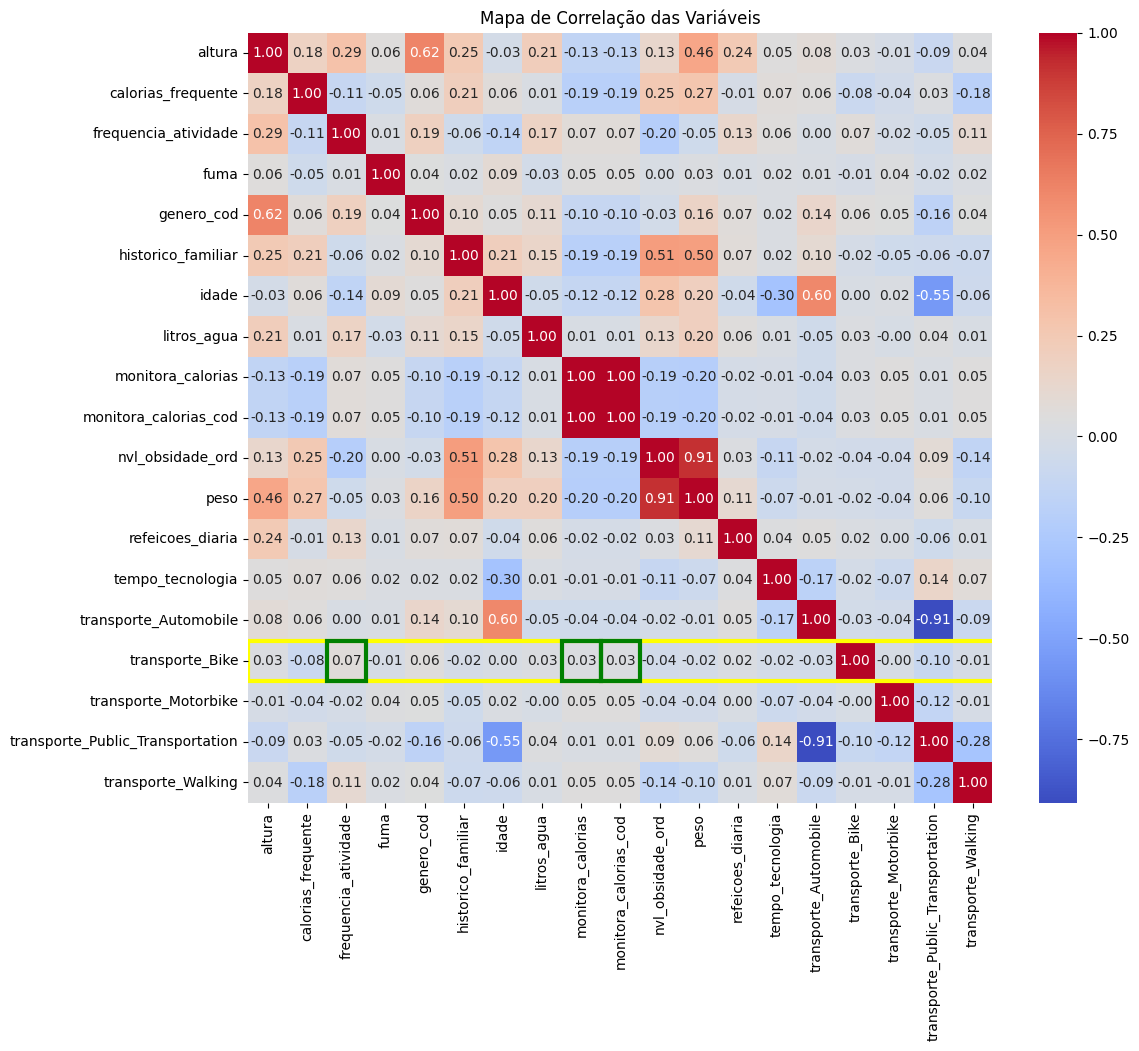

In [982]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação das Variáveis")

pontos = [(2,15), (8,15), (9,15)] 

rect = patches.Rectangle((0,15), 21,1, fill=False, edgecolor='yellow', lw=3) #adiciona uma ajuda visual para a nossa target
ax.add_patch(rect)

for i in range(len(pontos)):
    rect = patches.Rectangle(pontos[i], 1,1, fill=False, edgecolor='green', lw=3) #adiciona uma ajuda visual para a nossa target
    ax.add_patch(rect)

plt.show()

# 3 PIPELINE

## 3.1 Separando massa

In [983]:
base.head(10)

,altura,calorias_frequente,frequencia_atividade,fuma,genero_cod,historico_familiar,idade,litros_agua,monitora_calorias,monitora_calorias_cod,nvl_obsidade_ord,peso,refeicoes_diaria,tempo_tecnologia,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,0.320755,0,0.000000,0,0,1,0.148936,0.5,0,0,1.0,0.186567,0.666667,1.0,0,0,0,1,0
1,0.132075,0,1.000000,1,0,1,0.148936,1.0,1,1,1.0,0.126866,0.666667,0.0,0,0,0,1,0
2,0.660377,0,0.666667,0,1,1,0.191489,0.5,0,0,1.0,0.283582,0.666667,1.0,0,0,0,1,0
3,0.660377,0,0.666667,0,1,0,0.276596,0.5,0,0,2.0,0.358209,0.666667,0.0,0,0,0,0,1
4,0.622642,0,0.000000,0,1,0,0.170213,0.5,0,0,3.0,0.379104,0.000000,0.0,0,0,0,1,0
5,0.320755,1,0.000000,0,1,0,0.319149,0.5,0,0,1.0,0.104478,0.666667,0.0,1,0,0,0,0
6,0.094340,1,0.333333,0,0,1,0.191489,0.5,0,0,1.0,0.119403,0.666667,0.0,0,0,1,0,0
7,0.358491,0,1.000000,0,1,0,0.170213,0.5,0,0,1.0,0.104478,0.666667,0.0,0,0,0,1,0
8,0.622642,1,0.333333,0,1,1,0.212766,0.5,0,0,1.0,0.186567,0.666667,1.0,0,0,0,1,0
9,0.509434,1,0.333333,0,1,1,0.170213,0.5,0,0,1.0,0.216418,0.666667,1.0,0,0,0,1,0


In [984]:
#x = base[['peso','imc','historico_familiar_cod']]
#x = base.loc[:, base.columns.difference(['genero','vegetais_refeicao', 'entre_refeicao','frequencia_alcool','nvl_obsidade_ord','nvl_obsidade','imc','entre_refeicao_ord','frequencia_alcool_ord','nvl_obsidade_ord'])]
x = base.loc[:,base.columns.difference(['nvl_obsidade_ord'])]
y = base['nvl_obsidade_ord']

#x, y = base.loc[:,base.columns != 'nvl_obsidade_ord'],base['nvl_obsidade_ord']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [985]:
x.head()

,altura,calorias_frequente,frequencia_atividade,fuma,genero_cod,historico_familiar,idade,litros_agua,monitora_calorias,monitora_calorias_cod,peso,refeicoes_diaria,tempo_tecnologia,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,0.320755,0,0.000000,0,0,1,0.148936,0.5,0,0,0.186567,0.666667,1.0,0,0,0,1,0
1,0.132075,0,1.000000,1,0,1,0.148936,1.0,1,1,0.126866,0.666667,0.0,0,0,0,1,0
2,0.660377,0,0.666667,0,1,1,0.191489,0.5,0,0,0.283582,0.666667,1.0,0,0,0,1,0
3,0.660377,0,0.666667,0,1,0,0.276596,0.5,0,0,0.358209,0.666667,0.0,0,0,0,0,1
4,0.622642,0,0.000000,0,1,0,0.170213,0.5,0,0,0.379104,0.000000,0.0,0,0,0,1,0


## 3.2 Pipelines

In [986]:
# Criando o pipeline genérico, não é necessário escrever cada algoritmo de forma explícita por causa do GridSearchCV (mais detalhes a frente)
pipeline = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

In [987]:
# Definindo os parâmentros dos modelos que serão usados
# Entender depois para poder testar
parametros = [
    {
        'model': [LogisticRegression(max_iter=1000)],
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear']
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [None, 5, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    {
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5]
    }
]

In [988]:
# O GridSearchCV executa o pipeline com todos os algoritmos que tiverem parâmetros definidos, com isso economizamos código e deixa mais limpo
grid = GridSearchCV(pipeline, parametros, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'model': [LogisticRegre...max_iter=1000)], 'model__C': [0.1, 1, ...], 'model__solver': ['liblinear']}, {'model': [DecisionTreeClassifier()], 'model__max_depth': [None, 5, ...], 'model__min_samples_split': [2, 5, ...]}, ...]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


## 3.3 Resultados

In [989]:
print("Melhor modelo:", grid.best_estimator_)
print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia média (cv):", grid.best_score_)

Melhor modelo: Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=20, random_state=42))])
Melhores parâmetros: {'model': RandomForestClassifier(random_state=42), 'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Melhor acurácia média (cv): 0.950826119782979


In [990]:
y_pred = grid.predict(X_test)
print("\nRelatório no teste:")
print(classification_report(y_test, y_pred))


Relatório no teste:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        56
         1.0       0.87      0.95      0.91        62
         2.0       0.96      0.82      0.88        56
         3.0       0.96      0.96      0.96        50
         4.0       0.96      0.97      0.97        78
         5.0       0.97      0.98      0.97        58
         6.0       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.96      0.95       423



In [991]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_model__solver,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047035,0.045299,0.003053,0.001079,LogisticRegression(max_iter=1000),0.1,liblinear,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.488166,0.541420,0.482249,0.507418,0.519288,0.507708,0.021451,27
1,0.031980,0.022589,0.003686,0.002621,LogisticRegression(max_iter=1000),1.0,liblinear,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.650888,0.647929,0.642012,0.596439,0.623145,0.632083,0.020266,26
2,0.019327,0.001529,0.001911,0.000130,LogisticRegression(max_iter=1000),10.0,liblinear,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.730769,0.707101,0.710059,0.679525,0.724036,0.710298,0.017692,25
3,0.021060,0.029211,0.001792,0.000156,DecisionTreeClassifier(),NaN,NaN,None,2.0,NaN,"{'model': DecisionTreeClassifier(), 'model__ma...",0.934911,0.926036,0.923077,0.916914,0.940653,0.928318,0.008466,15
4,0.008454,0.001849,0.002272,0.000580,DecisionTreeClassifier(),NaN,NaN,None,5.0,NaN,"{'model': DecisionTreeClassifier(), 'model__ma...",0.926036,0.928994,0.911243,0.922849,0.931751,0.924174,0.007115,18


In [992]:
resultados = pd.DataFrame(grid.cv_results_)
resultados['model_name'] = resultados['param_model'].astype(str)

melhores_por_modelo = (
    resultados
    .sort_values('mean_test_score', ascending=False)
    .drop_duplicates(subset='model_name')  # mantém a melhor combinação por modelo
    .set_index('model_name')[['mean_test_score', 'params']]
)

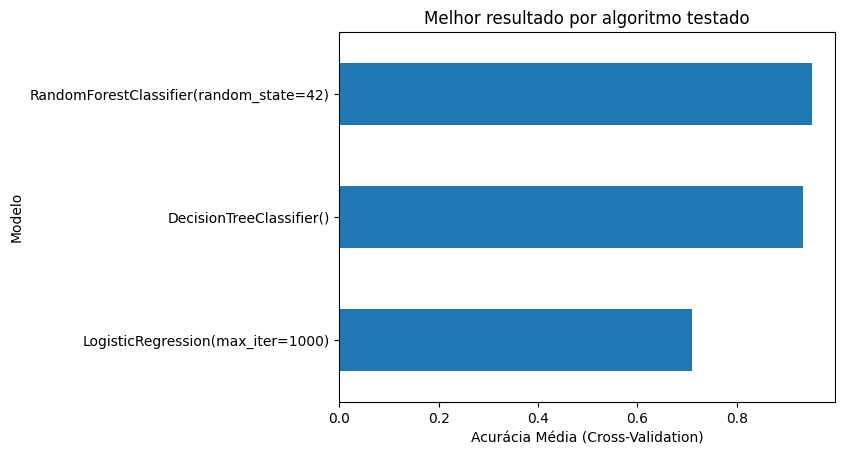

In [993]:
melhores_por_modelo['mean_test_score'].sort_values().plot.barh()
plt.xlabel('Acurácia Média (Cross-Validation)')
plt.ylabel('Modelo')
plt.title('Melhor resultado por algoritmo testado')
plt.show()

# X Algoritmo RandomForest

In [994]:
# x = base[['peso','imc','historico_familiar_cod']]
# y = base['nvl_obsidade_ord']

In [995]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [996]:
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Criamos listas para que a vizualização fique mais amigável
# labels = [0,1,2,3,4,5,6]
# nomes = ['Insufficient_Weight', 'Normal_Weight','Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# # Considerando os dados e o que estamos tentando avaliar não é surpresa que o algoritmo não tenhoa problemas em ter uma acurácia boas
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred, labels = labels, target_names = nomes))